
Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [ ]:
import pandas as pd

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)
df

Прочитайте отриману таблицю, використовуючи метод head

In [6]:
print("Перші 5 рядків таблиці:")
df.head()

Перші 5 рядків таблиці:


,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape

In [5]:
print("\nРозмір таблиці:")
df.shape


Розмір таблиці:


(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
print("\nТипи стовпців:")
df.dtypes


Типи стовпців:


N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [8]:
print("\nЧастка пропусків в кожному стовпці:")
df.isnull().sum() / len(df)


Частка пропусків в кожному стовпці:


N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [12]:
df = df.dropna(subset=['Язык.программирования'])
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
6,7,Junior Software Engineer,C#/.NET,NaN,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,...,False,ниже среднего,Веб-разработка,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600,NaN,DEV
7,8,Senior Software Engineer,C++,NaN,6,1,3300,500,Киев,до 10 человек,...,False,выше среднего,Другое,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,8693,Software Engineer,Java,NaN,5,1,3500,650,Удаленно,до 200 человек,...,False,средний,eCommerce,12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500,NaN,DEV
8694,8695,Junior Software Engineer,C#/.NET,NaN,1,1,550,550,Харьков,до 200 человек,...,False,ниже среднего,"Desktop Applications,Системное программирование",12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550,NaN,DEV
8695,8696,Software Engineer,Python,NaN,1,0.5,1500,1000,Киев,до 10 человек,...,False,средний,"Финансы и банки,eCommerce",12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500,NaN,DEV
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV


Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"


In [13]:
print("\nЧастка пропусків після видалення:")
df.isnull().sum() / len(df)



Частка пропусків після видалення:


N                                   0.000000
Должность                           0.000000
Язык.программирования               0.000000
Специализация                       0.999794
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.047590
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.006180
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [14]:
df = df.dropna()
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls


Визначте новий розмір таблиці за допомогою методу shape

In [15]:
print("\nРозмір таблиці після видалення рядків:")
df.shape


Розмір таблиці після видалення рядків:


(0, 25)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python


In [ ]:
python_data = df[df['Язык.программирования'] == 'Python']

Визначте розмір таблиці python_data за допомогою методу shape

In [17]:
print("\nРозмір таблиці python_data:")
python_data.shape


Розмір таблиці python_data:


(0, 25)

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"


In [ ]:
grouped_data = df.groupby('Должность').agg({'Зарплата.в.месяц': ['min', 'max']})
grouped_data

Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [ ]:
def fill_avg_salary(salary_values):
    return salary_values.mean()
grouped_data['avg'] = grouped_data['Зарплата.в.месяц']['max'].apply(fill_avg_salary)
grouped_data

Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [21]:
print("\nОписова статистика для стовпчика 'avg':")
grouped_data['avg'].describe()


Описова статистика для стовпчика 'avg':


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg, dtype: float64

Збережіть отриману таблицю в CSV файл

In [ ]:
df.to_csv('output_file.csv', index=False)
df

Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)

**Графік 1: Розподіл зарплати в місяць**

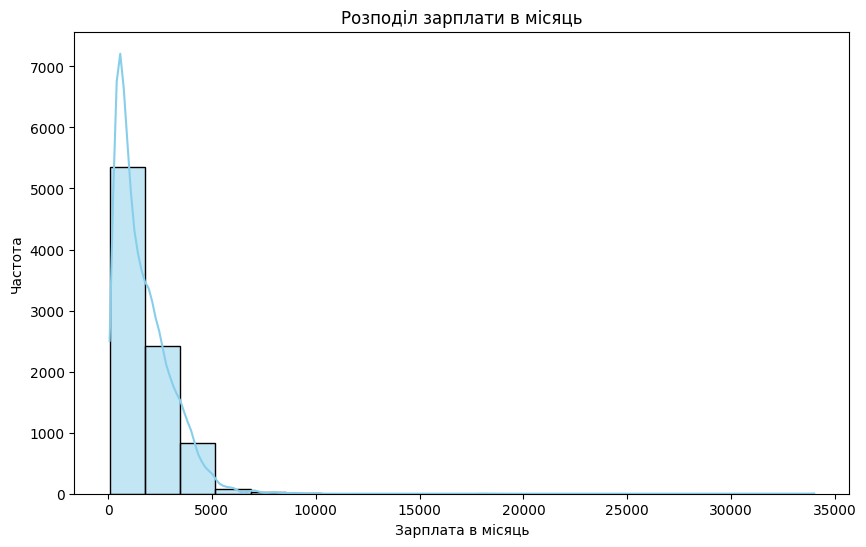

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)
plt.figure(figsize=(10, 6))
sns.histplot(df['Зарплата.в.месяц'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл зарплати в місяць')
plt.xlabel('Зарплата в місяць')
plt.ylabel('Частота')
plt.show()

**Графік 2: Box plot для розподілу зарплати за мовою програмування**

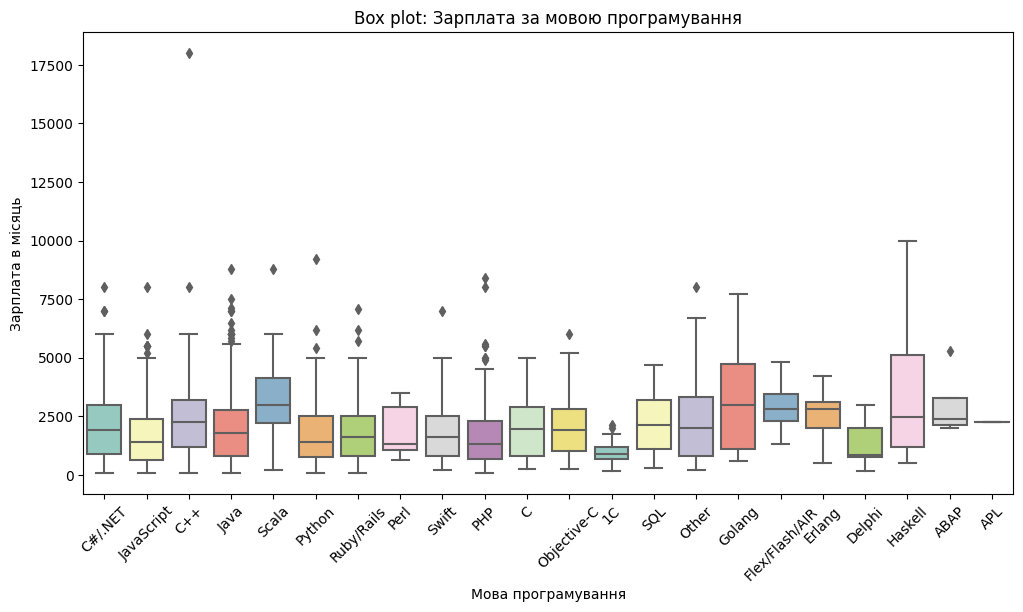

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Язык.программирования', y='Зарплата.в.месяц', data=df, palette='Set3')
plt.title('Box plot: Зарплата за мовою програмування')
plt.xlabel('Мова програмування')
plt.ylabel('Зарплата в місяць')
plt.xticks(rotation=45)
plt.show()

**Графік 3: Line plot для динаміки зміни зарплати за 12 місяців**

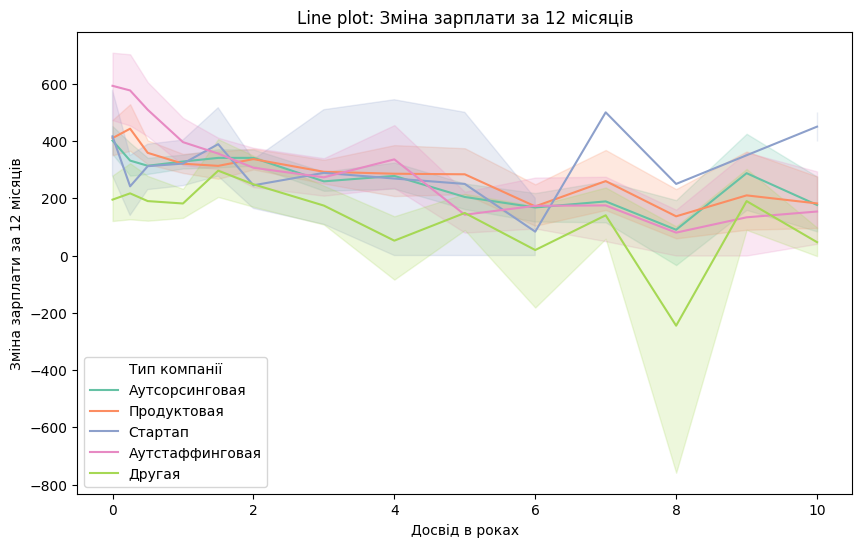

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='current_job_exp', y='Изменение.зарплаты.за.12.месяцев', data=df, hue='Тип.компании', palette='Set2')
plt.title('Line plot: Зміна зарплати за 12 місяців')
plt.xlabel('Досвід в роках')
plt.ylabel('Зміна зарплати за 12 місяців')
plt.legend(title='Тип компанії')
plt.show()

**Графік 4: Scatter plot для взаємодії общого та поточного досвіду роботи**

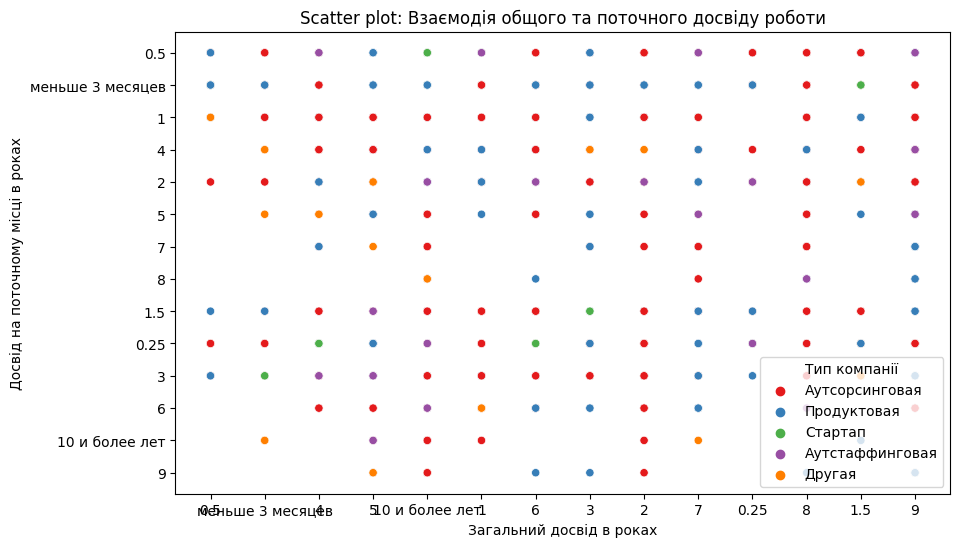

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Общий.опыт.работы', y='Опыт.работы.на.текущем.месте', data=df, hue='Тип.компании', palette='Set1')
plt.title('Scatter plot: Взаємодія общого та поточного досвіду роботи')
plt.xlabel('Загальний досвід в роках')
plt.ylabel('Досвід на поточному місці в роках')
plt.legend(title='Тип компанії')
plt.show()

**Графік 5: Count plot для розподілу за посадами**

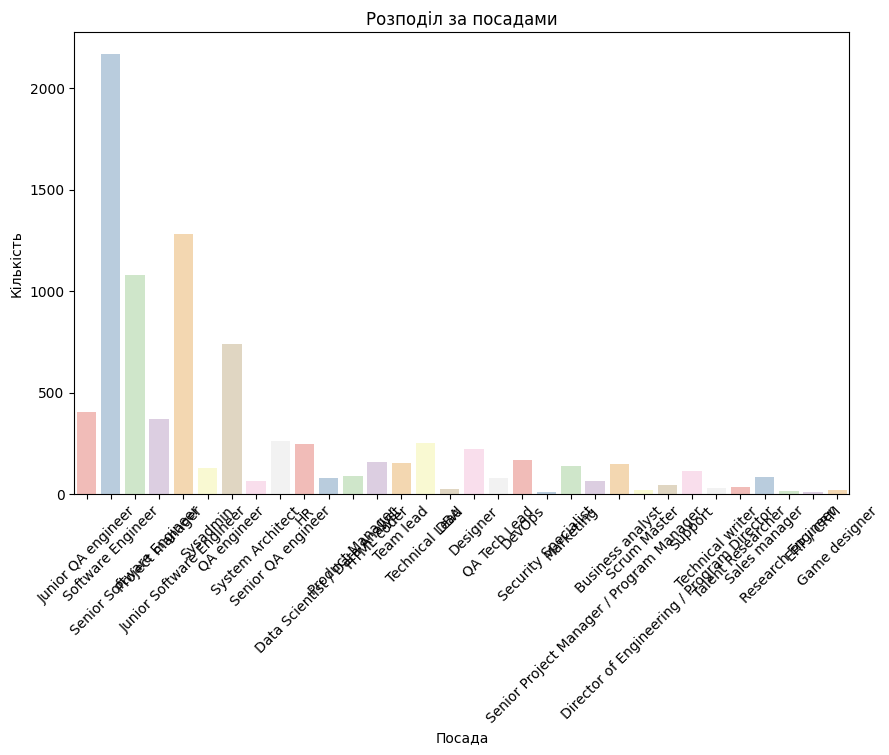

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Должность', data=df, palette='Pastel1')
plt.title('Розподіл за посадами')
plt.xlabel('Посада')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()